In [19]:
# TEST UTFÖRT AV FREDRIK DOMERT ERIKSSON

In [20]:
# Test test

In [21]:
import os
os.environ["OMP_NUM_THREADS"] = "1" 
os.environ["MKL_NUM_THREADS"] = "1" 

from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# Laddar upp csv-fil 'customerdata4' 
customer_data = pd.read_csv('customerdata4.csv')

In [23]:
# 1. Vi beskriver datan med .describe
customer_data.describe()


,CustomerID,Age,Annual Income (10kkr),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


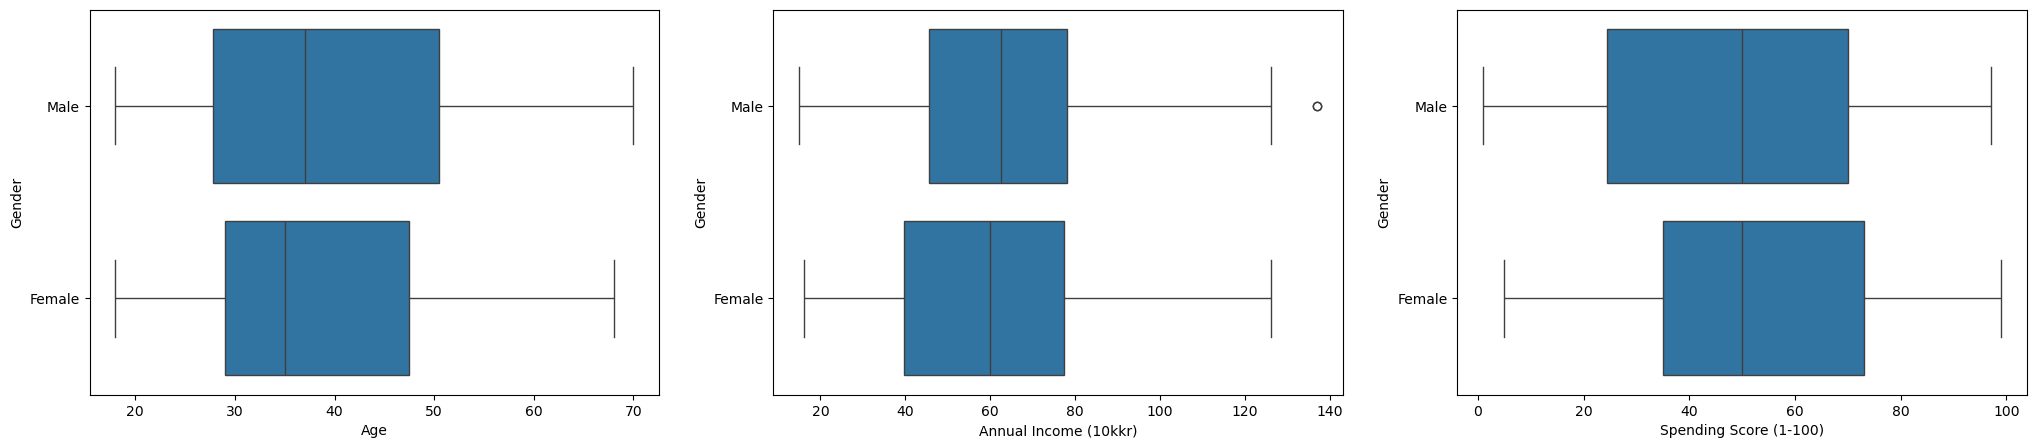

In [24]:
# 2. Boxplots
fig, axes = plt.subplots(1, 3, figsize=(25, 5))
sns.boxplot(data=customer_data, x="Age", y="Gender", ax = axes[0])
sns.boxplot(data=customer_data, x="Annual Income (10kkr)", y="Gender" ,ax = axes[1])
sns.boxplot(data=customer_data, x="Spending Score (1-100)", y="Gender" ,ax = axes[2])
plt.show()

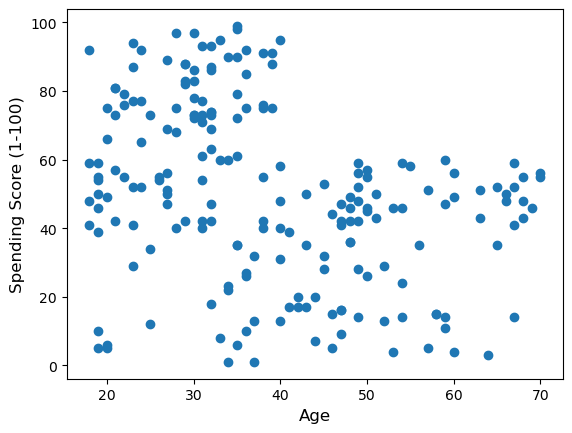

In [25]:
# 3. 

plt.scatter(customer_data.iloc[:,2].values, customer_data.iloc[:,4].values)
plt.xlabel("Age", size=12)
plt.ylabel("Spending Score (1-100)", size=12)
plt.show()

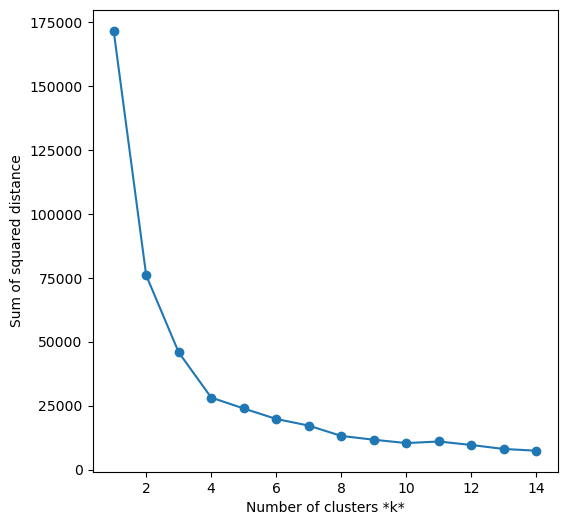

In [26]:
# Elbow
sse = []
x1 = customer_data.iloc[:, 2].values
x2 = customer_data.iloc[:, 4].values
X = np.stack((x1, x2), axis=-1)
data = np.array(list(zip(x1, x2))) # <--- Denna rad definierar 'data' - För K-means

# k_list is the list of range där vi får ut k-värdet.
k_list = list(range(1, 15))

for k in k_list:
    # km_model is the KMeans where we define the model for fitting the data
    km_model = KMeans(n_clusters=k)
    # fitting the data (X is the data set) to km_model
    km_model.fit(X)
    sse.append(km_model.inertia_)

# Plot sse against k and find the value of k where it starts to flatten down and make angle like elbow.
plt.figure(figsize=(6, 6))
plt.plot(k_list, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.show()

[[55.40816327 48.04081633]
 [27.32608696 49.36956522]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]]


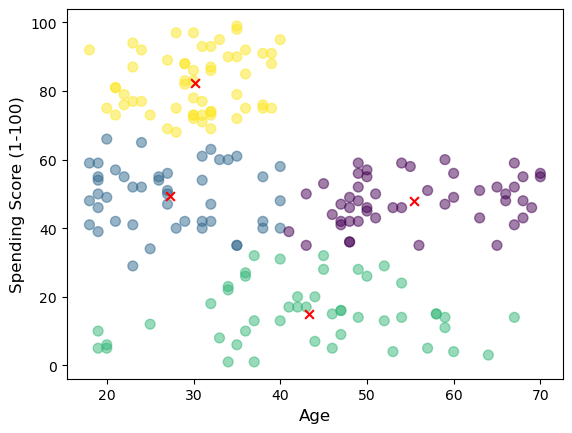

In [27]:
# Motivera k värdet baserat på grafen ovan. Elbox
# Prova med olika k-värden
k = 4

kmeans_data = KMeans(n_clusters = k).fit(data)

centroids = kmeans_data.cluster_centers_
print(centroids)

plt.scatter(data[:,0], data[:,1], c= kmeans_data.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=40,marker='x')
plt.xlabel("Age", size=12)
plt.ylabel("Spending Score (1-100)", size=12)
plt.show()

In [28]:
# 4. Fortsätt